## Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types
#Modified by Abdessadek Rifqui

## Pure python function

In [10]:
def solve_1d_linearconv_pure(u, nt, nx, dt, dx, c):

    #fill the update of u
    for n in range(nt):
        for i in range(1,nx):
            u[i]=u[i]-c*dt/dx*(u[i]-u[i-1])

    return 0

## Numba accelerator

In [11]:
@njit(fastmath=True)
def solve_1d_linearconv_numba(u, nt, nx, dt, dx, c):

    #fill the update of u
    for n in range(nt):
        for i in range(1,nx):
            u[i]=u[i]-c*dt/dx*(u[i]-u[i-1])

    return 0

## Pyccel accelerator

In [12]:
@types('float[:]', 'int', 'int', 'float','float', 'float')
def solve_1d_linearconv_pyccel(u, nt, nx, dt, dx, c):
    

    #fill the update of u
    for n in range(nt):
        for i in range(1,nx):
            u[i]=u[i]-c*dt/dx*(u[i]-u[i-1])
            
    return 0

## Inputs

Text(0.5, 1.0, '1D Linear Convection')

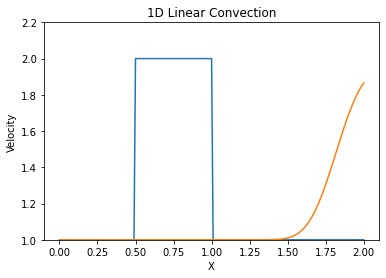

In [13]:
nx = 201  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 200    #nt is the number of timesteps we want to calculate
c = 1      #assume wavespeed of c = 1
dt = 0.004
grid = np.linspace(0,2,nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
solve_1d_linearconv_pure(u, nt, nx, dt, dx, c)
#Plotting data
plt.plot(grid,u)
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')

## Call Funtions

### Pure function

In [15]:
%timeit solve_1d_linearconv_pure(u, nt, nx, dt, dx, c)

28.7 ms ± 140 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Function with numba accelerator

In [16]:
%timeit solve_1d_linearconv_numba(u, nt, nx, dt, dx, c)

131 µs ± 348 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Function with pyccel accelerator

In [17]:
solve_1d_linearconv_f90 = epyccel(solve_1d_linearconv_pyccel)

In [20]:
%timeit solve_1d_linearconv_f90(u, nt, nx, dt, dx, c)

132 µs ± 1.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
